# Pandas 데이터 분석 예제

## 2012 Federal Election Commission Database

In [1]:
fec = pd.read_csv('/home/dockeruser/data/pydata-book-master/ch09/P00000001-ALL.csv', index_col=False, low_memory=False)

In [2]:
fec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


In [3]:
fec.ix[123456]

cmte_id                             C00431445
cand_id                             P80003338
cand_nm                         Obama, Barack
contbr_nm                         ELLMAN, IRA
contbr_city                             TEMPE
contbr_st                                  AZ
contbr_zip                          852816719
contbr_employer      ARIZONA STATE UNIVERSITY
contbr_occupation                   PROFESSOR
contb_receipt_amt                          50
contb_receipt_dt                    01-DEC-11
receipt_desc                              NaN
memo_cd                                   NaN
memo_text                                 NaN
form_tp                                 SA17A
file_num                               772372
Name: 123456, dtype: object

In [4]:
unique_cands = fec.cand_nm.unique()
unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick', 'Cain, Herman',
       'Gingrich, Newt', 'McCotter, Thaddeus G', 'Huntsman, Jon',
       'Perry, Rick'], dtype=object)

In [5]:
unique_cands[2]

'Obama, Barack'

In [6]:
parties = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

In [7]:
fec.cand_nm[123456:123461]

123456    Obama, Barack
123457    Obama, Barack
123458    Obama, Barack
123459    Obama, Barack
123460    Obama, Barack
Name: cand_nm, dtype: object

In [8]:
fec.cand_nm[123456:123461].map(parties)

123456    Democrat
123457    Democrat
123458    Democrat
123459    Democrat
123460    Democrat
Name: cand_nm, dtype: object

In [9]:
fec['party'] = fec.cand_nm.map(parties)

In [10]:
fec['party'].value_counts()

Democrat      593746
Republican    407985
Name: party, dtype: int64

In [11]:
(fec.contb_receipt_amt > 0).value_counts()

True     991475
False     10256
Name: contb_receipt_amt, dtype: int64

In [12]:
(fec.contb_receipt_amt > 0).value_counts()

True     991475
False     10256
Name: contb_receipt_amt, dtype: int64

### 직장 및 피고용별 통계

In [13]:
fec.contbr_occupation.value_counts()[:10]

RETIRED                                   234829
INFORMATION REQUESTED                      35176
ATTORNEY                                   34409
HOMEMAKER                                  30199
PHYSICIAN                                  23530
INFORMATION REQUESTED PER BEST EFFORTS     21364
ENGINEER                                   14372
TEACHER                                    13998
CONSULTANT                                 13335
PROFESSOR                                  12565
Name: contbr_occupation, dtype: int64

In [14]:
occ_mapping = {
   'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED',
   'C.E.O.': 'CEO'
}

# If no mapping provided, return x
f = lambda x: occ_mapping.get(x, x)
fec.contbr_occupation = fec.contbr_occupation.map(f)

In [15]:
emp_mapping = {
   'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'SELF' : 'SELF-EMPLOYED',
   'SELF EMPLOYED' : 'SELF-EMPLOYED',
}

# If no mapping provided, return x
f = lambda x: emp_mapping.get(x, x)
fec.contbr_employer = fec.contbr_employer.map(f)

In [16]:
by_occupation = fec.pivot_table('contb_receipt_amt',
                                index='contbr_occupation',
                                columns='party', aggfunc='sum')

In [17]:
over_2mm = by_occupation[by_occupation.sum(1) > 2000000]
over_2mm

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11126932.97,7.343540e+06
CEO,2071474.79,3.932686e+06
CONSULTANT,2459812.71,2.472815e+06
ENGINEER,950425.55,1.780102e+06
EXECUTIVE,1355161.05,3.918557e+06
HOMEMAKER,4243394.30,1.324141e+07
INVESTOR,884133.00,2.320349e+06
LAWYER,3159391.87,3.785903e+05
MANAGER,762693.22,1.404878e+06


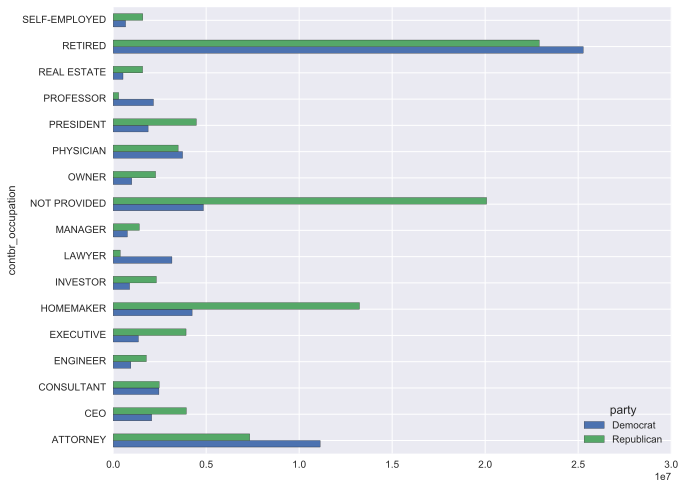

In [18]:
over_2mm.plot(kind='barh', figsize=(10,8))
plt.show()

In [19]:
fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack', 'Romney, Mitt'])]

In [20]:
def get_top_amounts(group, key, n=5):
    totals = group.groupby(key)['contb_receipt_amt'].sum()

    # Order totals by key in descending order
    return totals.sort_values(ascending=False)[:n]

In [21]:
grouped = fec_mrbo.groupby('cand_nm')
grouped.apply(get_top_amounts, 'contbr_occupation', n=7)

cand_nm        contbr_occupation
Obama, Barack  RETIRED              25270507.23
               ATTORNEY             11126932.97
               NOT PROVIDED          4849801.96
               HOMEMAKER             4243394.30
               PHYSICIAN             3732387.44
               LAWYER                3159391.87
               CONSULTANT            2459812.71
Romney, Mitt   RETIRED              11266949.23
               NOT PROVIDED         11173374.84
               HOMEMAKER             8037250.86
               ATTORNEY              5302578.82
               PRESIDENT             2403439.77
               CEO                   2247242.03
               EXECUTIVE             2230653.79
Name: contb_receipt_amt, dtype: float64

In [22]:
grouped.apply(get_top_amounts, 'contbr_employer', n=10)

cand_nm        contbr_employer   
Obama, Barack  RETIRED               22665902.20
               SELF-EMPLOYED         18584277.16
               NOT EMPLOYED           8584118.70
               NOT PROVIDED           5036178.37
               HOMEMAKER              2599987.04
               STUDENT                 318831.45
               VOLUNTEER               257104.00
               MICROSOFT               215585.36
               SIDLEY AUSTIN LLP       168254.00
               REFUSED                 149516.07
Romney, Mitt   NOT PROVIDED          11827237.12
               RETIRED               11264701.35
               HOMEMAKER              8037000.86
               SELF-EMPLOYED          7265136.53
               STUDENT                 488642.82
               CREDIT SUISSE           265650.00
               MORGAN STANLEY          262266.00
               GOLDMAN SACH & CO.      233250.00
               BARCLAYS CAPITAL        162750.00
               H.I.G. CAPITAL      

In [23]:
g = grouped.apply(get_top_amounts, 'contbr_employer', n=10).reset_index(0)

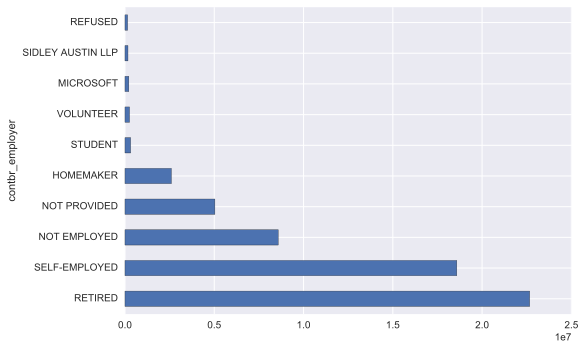

In [24]:
g[g.cand_nm == "Obama, Barack"].contb_receipt_amt.plot(kind="barh")
plt.show()

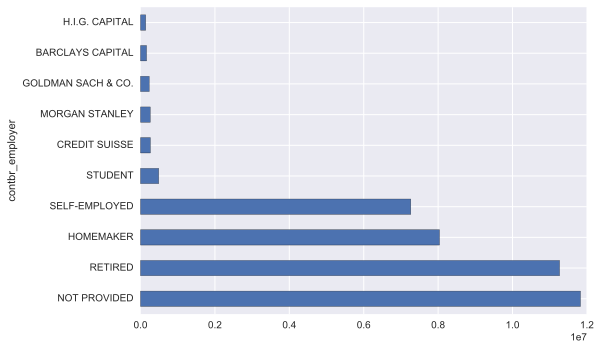

In [25]:
g[g.cand_nm == "Romney, Mitt"].contb_receipt_amt.plot(kind="barh")
plt.show()

### 기부 금액

In [26]:
bins = np.array([0, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000])
labels = pd.cut(fec_mrbo.contb_receipt_amt, bins)
labels

411           (10, 100]
412         (100, 1000]
413         (100, 1000]
414           (10, 100]
415           (10, 100]
416           (10, 100]
417         (100, 1000]
418           (10, 100]
419         (100, 1000]
420           (10, 100]
421           (10, 100]
422         (100, 1000]
423         (100, 1000]
424         (100, 1000]
425         (100, 1000]
426         (100, 1000]
427       (1000, 10000]
428         (100, 1000]
429         (100, 1000]
430           (10, 100]
431       (1000, 10000]
432         (100, 1000]
433         (100, 1000]
434         (100, 1000]
435         (100, 1000]
436         (100, 1000]
437           (10, 100]
438         (100, 1000]
439         (100, 1000]
440           (10, 100]
              ...      
701356        (10, 100]
701357          (1, 10]
701358        (10, 100]
701359        (10, 100]
701360        (10, 100]
701361        (10, 100]
701362      (100, 1000]
701363        (10, 100]
701364        (10, 100]
701365        (10, 100]
701366        (1

In [27]:
grouped = fec_mrbo.groupby(['cand_nm', labels])
grouped.size().unstack(0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493.0,77.0
"(1, 10]",40070.0,3681.0
"(10, 100]",372280.0,31853.0
"(100, 1000]",153991.0,43357.0
"(1000, 10000]",22284.0,26186.0
"(10000, 100000]",2.0,1.0
"(100000, 1000000]",3.0,NaN
"(1000000, 10000000]",4.0,NaN


In [28]:
bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)
bucket_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",318.24,77.00
"(1, 10]",337267.62,29819.66
"(10, 100]",20288981.41,1987783.76
"(100, 1000]",54798531.46,22363381.69
"(1000, 10000]",51753705.67,63942145.42
"(10000, 100000]",59100.00,12700.00
"(100000, 1000000]",1490683.08,NaN
"(1000000, 10000000]",7148839.76,NaN


In [29]:
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1), axis=0)
normed_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.805182,0.194818
"(1, 10]",0.918767,0.081233
"(10, 100]",0.910769,0.089231
"(100, 1000]",0.710176,0.289824
"(1000, 10000]",0.447326,0.552674
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,NaN
"(1000000, 10000000]",1.000000,NaN


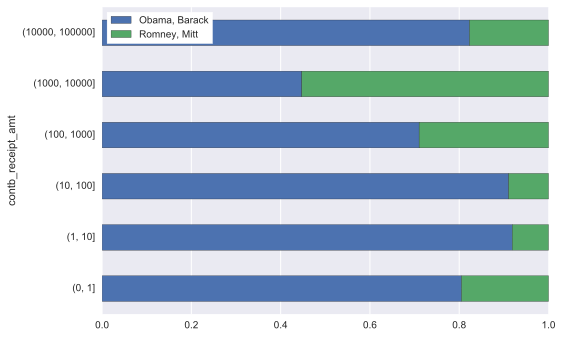

In [36]:
normed_sums[:-2].plot(kind='barh', stacked=True)
legend = plt.legend(loc=0, frameon = 1)
frame = legend.get_frame()
frame.set_color('white')

### 주별 기부

In [37]:
grouped = fec_mrbo.groupby(['cand_nm', 'contbr_st'])
totals = grouped.contb_receipt_amt.sum().unstack(0).fillna(0)
totals = totals[totals.sum(1) > 100000]
totals[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,275353.15,86204.24
AL,537835.48,504882.08
AR,324802.28,105351.50
AZ,1484241.84,1850484.23
CA,23370680.84,10908232.46
CO,2104551.38,1477810.82
CT,2037216.66,3377421.85
DC,4317865.85,999740.50
DE,325394.14,81404.00


In [38]:
percent = totals.div(totals.sum(1), axis=0)
percent[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,0.761575,0.238425
AL,0.515802,0.484198
AR,0.755084,0.244916
AZ,0.445087,0.554913
CA,0.681780,0.318220
CO,0.587476,0.412524
CT,0.376242,0.623758
DC,0.811994,0.188006
DE,0.799891,0.200109
